In [2]:
!pip install huggingface_hub

In [4]:
import pandas as pd


In [5]:
df = pd.read_json('hf://datasets/lewtun/github-issues/datasets-issues-with-comments.jsonl', lines = True)

### Issue Tracking
- Analyze the lifecycle of the issue from creation to closure.
- Identify bottlenecks in the development process or common factors in unresolved issues.

### Label Analysis
- Examine how labels are used to categorize issues.
- Help refine label usage or automate label assignments based on issue content.

### Sentiment Analysis
- Use the 'body' column to perform sentiment analysis to gauge user sentiment in issue discussions.
- Provide insights into user satisfaction and pinpoint areas needing improvement.

### Collaboration Patterns
- Analyze the 'assignee' and 'assignees' columns to understand collaboration patterns and team dynamics.

### Automate Responses
- Train a model to automatically suggest responses or solutions to common issues based on the 'body' text.


In [6]:
df

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,created_at,updated_at,closed_at,author_association,active_lock_reason,pull_request,body,timeline_url,performed_via_github_app,is_pull_request
0,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2955,1003999469,PR_kwDODunzps4sHuRu,2955,Update legacy Python image for CI tests in Linux,...,2021-09-22 08:25:27,2021-09-22 09:23:28,NaT,MEMBER,NaN,{'url': 'https://api.github.com/repos/huggingf...,"Instead of legacy, use next-generation conveni...",https://api.github.com/repos/huggingface/datas...,NaN,True
1,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2954,1003904803,PR_kwDODunzps4sHa8O,2954,Run tests in parallel,...,2021-09-22 07:00:44,2021-09-22 07:56:13,NaT,MEMBER,NaN,{'url': 'https://api.github.com/repos/huggingf...,Run CI tests in parallel to speed up the test ...,https://api.github.com/repos/huggingface/datas...,NaN,True
2,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2952,1002704096,PR_kwDODunzps4sDU8S,2952,Fix missing conda deps,...,2021-09-21 15:23:01,2021-09-22 04:39:59,2021-09-21 15:30:44,MEMBER,NaN,{'url': 'https://api.github.com/repos/huggingf...,`aiohttp` was added as a dependency in #2662 b...,https://api.github.com/repos/huggingface/datas...,NaN,True
3,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2951,1001267888,PR_kwDODunzps4r-lGs,2951,Dummy labels no longer on by default in `to_tf...,...,2021-09-20 18:26:59,2021-09-21 14:00:57,2021-09-21 10:14:32,CONTRIBUTOR,NaN,{'url': 'https://api.github.com/repos/huggingf...,"After more experimentation, I think I have a w...",https://api.github.com/repos/huggingface/datas...,NaN,True
4,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2950,1001085353,PR_kwDODunzps4r-AKu,2950,Fix fn kwargs in filter,...,2021-09-20 15:10:26,2021-09-20 16:22:59,2021-09-20 15:28:01,MEMBER,NaN,{'url': 'https://api.github.com/repos/huggingf...,#2836 broke the `fn_kwargs` parameter of `filt...,https://api.github.com/repos/huggingface/datas...,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/issues/5,600295889,MDU6SXNzdWU2MDAyOTU4ODk=,5,ValueError when a split is empty,...,2020-04-15 13:25:13,2020-04-29 09:23:05,2020-04-29 09:23:05,COLLABORATOR,NaN,None,"When a split is empty either TEST, VALIDATION ...",https://api.github.com/repos/huggingface/datas...,NaN,False
3015,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas

In [7]:
df.columns

Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'active_lock_reason', 'pull_request', 'body', 'timeline_url',
       'performed_via_github_app', 'is_pull_request'],
      dtype='object')

In [12]:
print(df.info)

<bound method DataFrame.info of                                                     url  \
0     https://api.github.com/repos/huggingface/datas...   
1     https://api.github.com/repos/huggingface/datas...   
2     https://api.github.com/repos/huggingface/datas...   
3     https://api.github.com/repos/huggingface/datas...   
4     https://api.github.com/repos/huggingface/datas...   
...                                                 ...   
3014  https://api.github.com/repos/huggingface/datas...   
3015  https://api.github.com/repos/huggingface/datas...   
3016  https://api.github.com/repos/huggingface/datas...   
3017  https://api.github.com/repos/huggingface/datas...   
3018  https://api.github.com/repos/huggingface/datas...   

                                         repository_url  \
0     https://api.github.com/repos/huggingface/datasets   
1     https://api.github.com/repos/huggingface/datasets   
2     https://api.github.com/repos/huggingface/datasets   
3     https://api.githu

In [10]:
print(df.head(5))

                                                 url  \
0  https://api.github.com/repos/huggingface/datas...   
1  https://api.github.com/repos/huggingface/datas...   
2  https://api.github.com/repos/huggingface/datas...   
3  https://api.github.com/repos/huggingface/datas...   
4  https://api.github.com/repos/huggingface/datas...   

                                      repository_url  \
0  https://api.github.com/repos/huggingface/datasets   
1  https://api.github.com/repos/huggingface/datasets   
2  https://api.github.com/repos/huggingface/datasets   
3  https://api.github.com/repos/huggingface/datasets   
4  https://api.github.com/repos/huggingface/datasets   

                                          labels_url  \
0  https://api.github.com/repos/huggingface/datas...   
1  https://api.github.com/repos/huggingface/datas...   
2  https://api.github.com/repos/huggingface/datas...   
3  https://api.github.com/repos/huggingface/datas...   
4  https://api.github.com/repos/huggingface/da

In [13]:
print(df.loc[0])

url                         https://api.github.com/repos/huggingface/datas...
repository_url              https://api.github.com/repos/huggingface/datasets
labels_url                  https://api.github.com/repos/huggingface/datas...
comments_url                https://api.github.com/repos/huggingface/datas...
events_url                  https://api.github.com/repos/huggingface/datas...
html_url                    https://github.com/huggingface/datasets/pull/2955
id                                                                 1003999469
node_id                                                   PR_kwDODunzps4sHuRu
number                                                                   2955
title                        Update legacy Python image for CI tests in Linux
user                        {'login': 'albertvillanova', 'id': 8515462, 'n...
labels                                                                     []
state                                                           

In [11]:
print(df.loc[:, ["comments"]])

                                               comments
0                                                    []
1     [There is a speed up in Windows machines:\r\n-...
2                                                    []
3     [@lhoestq Let me make sure we never need it, a...
4                                                    []
...                                                 ...
3014  [To fix this I propose to modify only the file...
3015  [Yes! I see mostly two options for this:\r\n- ...
3016  [Yes!\r\n- pandas will be a one-liner in `arro...
3017  [My first bug report ❤️\r\nLooking into this r...
3018                                                 []

[3019 rows x 1 columns]


In [17]:
# Sort the pull requests by 'created_at' date in descending order to see the most recent ones
recent_pr = df.sort_values(by='created_at', ascending=False)
print(recent_pr[['number', 'title', 'created_at']])



      number                                              title  \
0       2955   Update legacy Python image for CI tests in Linux   
100     2955   Update legacy Python image for CI tests in Linux   
101     2954                              Run tests in parallel   
1       2954                              Run tests in parallel   
2       2952                             Fix missing conda deps   
...      ...                                                ...   
3014       5                   ValueError when a split is empty   
3015       4  [Feature] Keep the list of labels of a dataset...   
3016       3                     [Feature] More dataset outputs   
3017       2                      Issue to read a local dataset   
3018       1                     changing nlp.bool to nlp.bool_   

              created_at  
0    2021-09-22 08:25:27  
100  2021-09-22 08:25:27  
101  2021-09-22 07:00:44  
1    2021-09-22 07:00:44  
2    2021-09-21 15:23:01  
...                  ...  
3014 2

In [ ]:
data_sorted_by_comments = df.sort_values(by='comments')

In [21]:
df['labels']

0       []
1       []
2       []
3       []
4       []
        ..
3014    []
3015    []
3016    []
3017    []
3018    []
Name: labels, Length: 3019, dtype: object

In [10]:
df['created_at'] = pd.to_datetime(df['created_at'])

In [11]:
df.columns

Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'active_lock_reason', 'pull_request', 'body', 'timeline_url',
       'performed_via_github_app', 'is_pull_request'],
      dtype='object')

In [12]:
df['closed_at'] = pd.to_datetime(df['closed_at'])

In [13]:
df['duration'] = df['closed_at'] - df['created_at']

In [14]:
df['duration']

0                   NaT
1                   NaT
2       0 days 00:07:43
3       0 days 15:47:33
4       0 days 00:17:35
             ...       
3014   13 days 19:57:52
3015   18 days 19:54:47
3016   18 days 20:04:13
3017   27 days 00:36:31
3018    0 days 01:43:38
Name: duration, Length: 3019, dtype: timedelta64[ns]

In [15]:
avg_duration = df['duration'].mean()

In [16]:
print(avg_duration)

9 days 02:13:10.536137667


In [18]:
long_issues = df[df['duration'] > df['duration'].quantile(0.95)]

In [19]:
long_issues

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,updated_at,closed_at,author_association,active_lock_reason,pull_request,body,timeline_url,performed_via_github_app,is_pull_request,duration
304,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2747,958867627,MDExOlB1bGxSZXF1ZXN0NzAyMDcwOTgy,2747,add multi-proc in `to_json`,...,2021-09-13 13:56:37,2021-09-13 13:56:37,CONTRIBUTOR,NaN,{'url': 'https://api.github.com/repos/huggingf...,Closes #2663. I've tried adding multiprocessin...,https://api.github.com/repos/huggingface/datas...,NaN,True,41 days 05:26:24
306,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2745,958269579,MDExOlB1bGxSZXF1ZXN0NzAxNTc0Mjcz,2745,added semeval18_emotion_classification dataset,...,2021-09-21 09:48:35,2021-09-21 09:48:35,CONTRIBUTOR,NaN,{'url': 'https://api.github.com/repos/huggingf...,I added the data set of SemEval 2018 Task 1 (S...,https://api.github.com/repos/huggingface/datas...,NaN,True,49 days 18:08:40
320,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2731,956087452,MDExOlB1bGxSZXF1ZXN0Njk5NzQwMjg5,2731,Adding to_tf_dataset method,...,2021-09-16 13:50:54,2021-09-16 13:50:54,CONTRIBUTOR,NaN,{'url': 'https://api.github.com/repos/huggingf...,"Oh my **god** do not merge this yet, it's just...",https://api.github.com/repos/huggingface/datas...,NaN,True,48 days 19:40:29
333,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2718,953360663,MDExOlB1bGxSZXF1ZXN0Njk3NDE0NTQy,2718,New documentation structure,...,2021-09-13 17:20:53,2021-09-13 17:20:52,CONTRIBUTOR,NaN,{'url': 'https://api.github.com/repos/huggingf...,Organize Datasets documentation into four docu...,https://api.github.com/repos/huggingface/datas...,NaN,True,48 days 18:05:39
385,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/issues...,946552273,MDU6SXNzdWU5NDY1NTIyNzM=,2663,[`to_json`] add multi-proc sharding support,...,2021-09-13 13:56:37,2021-09-13 13:56:37,CONTRIBUTOR,NaN,None,As discussed on slack it appears that `to_json...,https://api.github.com/repos/huggingface/datas...,NaN,False,58 days 18:14:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2881,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/issues...,619225191,MDU6SXNzdWU2MTkyMjUxOTE=,138,Consider renaming to nld,...,2020-12-17 20:56:31,2020-09-28 00:08:10,NONE,NaN,None,Hey :)\r\n\r\nJust making a thread here record...,https://api.github.com/repos/huggingface/datas...,NaN,False,135 days 03:44:43
2886,https://api.github.com/repos/huggingface/datas...,https

In [20]:
long_issue_labels = long_issues['labels'].value_counts()
print("Common labels for long-standing issues:", long_issue_labels)

Common labels for long-standing issues: labels
[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     91
[{'id': 2067376369, 'node_id': 'MDU6TGFiZWwyMDY3Mzc2MzY5', 'url': 'https://api.github.com/repos/huggingface/datasets/labels/dataset%20request', 'name': 'dataset request', 'color': 'e99695', 'default': False, 'description': 

In [22]:
import matplotlib.pyplot as plt

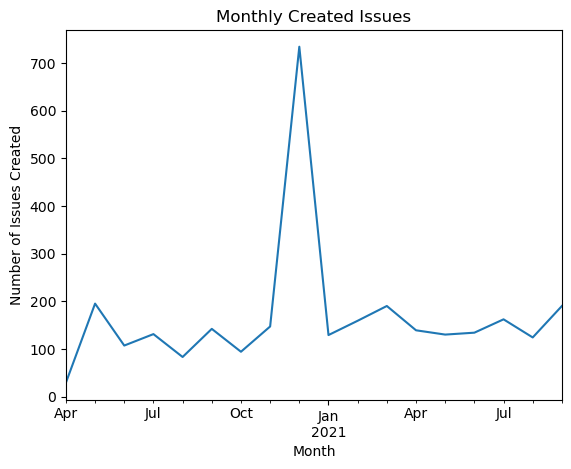

In [26]:
df.set_index('created_at').resample('MS').size().plot(title='Monthly Created Issues')
plt.xlabel('Month')
plt.ylabel('Number of Issues Created')
plt.show()

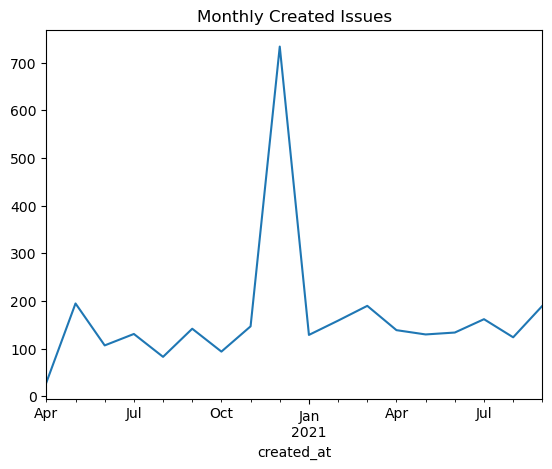

In [25]:
df.set_index('created_at').resample('ME').size().plot(title='Monthly Created Issues')
plt.show()

<Axes: xlabel='closed_at'>

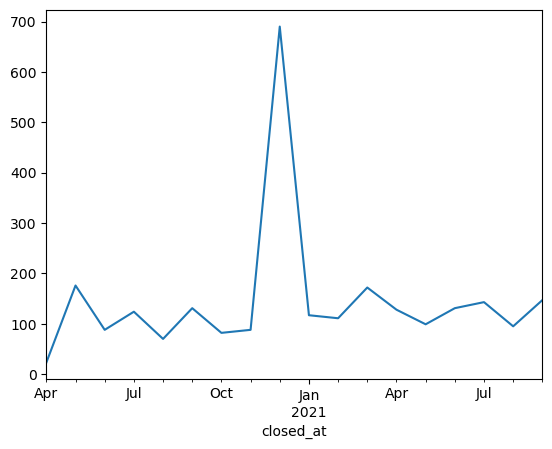

In [28]:
df.set_index('closed_at').resample('MS').size().plot()

In [29]:
avg_duration


Timedelta('9 days 02:13:10.536137667')

In [34]:
df.duration

0                   NaT
1                   NaT
2       0 days 00:07:43
3       0 days 15:47:33
4       0 days 00:17:35
             ...       
3014   13 days 19:57:52
3015   18 days 19:54:47
3016   18 days 20:04:13
3017   27 days 00:36:31
3018    0 days 01:43:38
Name: duration, Length: 3019, dtype: timedelta64[ns]

In [ ]:
df.set_index('duration').resample().size().plot()

TypeError: NDFrame.resample() missing 1 required positional argument: 'rule'

UFuncTypeError: ufunc 'less' did not contain a loop with signature matching types (<class 'numpy.dtypes.TimeDelta64DType'>, <class 'numpy.dtypes.Float64DType'>) -> None

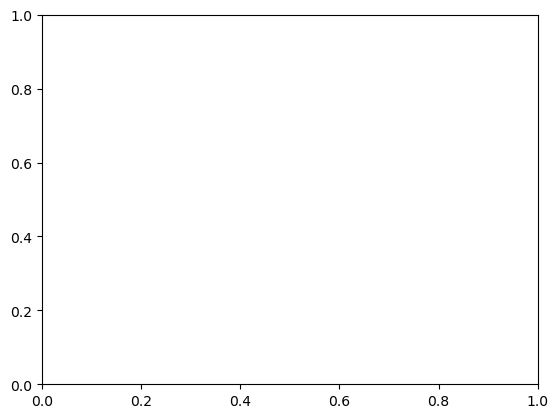

In [39]:
df['duration'] = df['duration'].dropna().astype('timedelta64[ns]').plot(kind='hist', bins= 50, title='Distribution of Issue Durations (in hours)')
plt.show()


In [35]:
df['duration']

0                   NaT
1                   NaT
2       0 days 00:07:43
3       0 days 15:47:33
4       0 days 00:17:35
             ...       
3014   13 days 19:57:52
3015   18 days 19:54:47
3016   18 days 20:04:13
3017   27 days 00:36:31
3018    0 days 01:43:38
Name: duration, Length: 3019, dtype: timedelta64[ns]

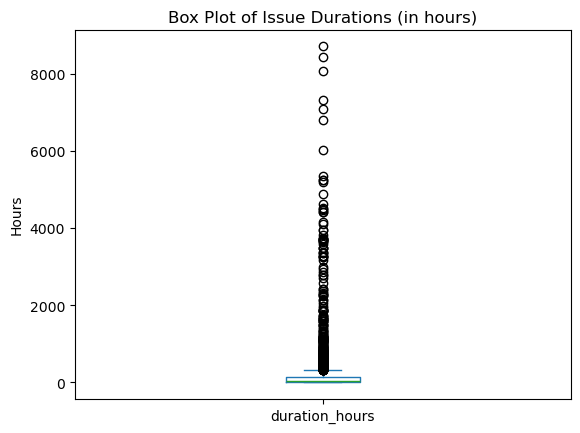

In [40]:
# Convert duration to hours for easier interpretation
df['duration_hours'] = df['duration'].dt.total_seconds() / 3600
df['duration_hours'].plot(kind='box', title='Box Plot of Issue Durations (in hours)')
plt.ylabel('Hours')
plt.show()


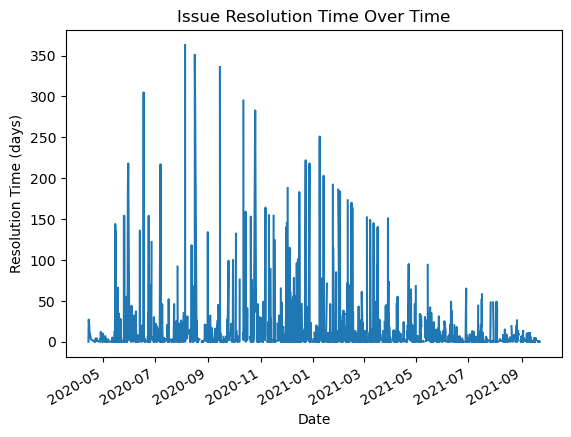

In [41]:
df.set_index('created_at')['duration'].dt.days.plot(title='Issue Resolution Time Over Time')
plt.xlabel('Date')
plt.ylabel('Resolution Time (days)')
plt.show()


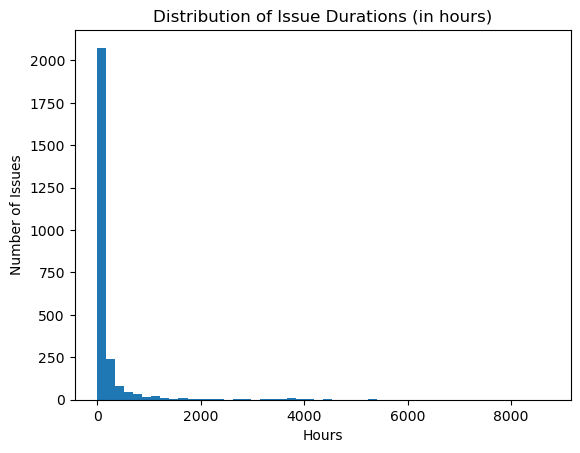

In [44]:
df['duration_hours'] = df['duration'].dropna().dt.total_seconds() / 3600

# Now plot the histogram of durations in hours
df['duration_hours'].plot(kind='hist', bins=50, title='Distribution of Issue Durations (in hours)')
plt.xlabel('Hours')
plt.ylabel('Number of Issues')
plt.show()

### 1. Issue Tracking
- Analyze the lifecycle of the issue from creation to closure.
- Identify bottlenecks in the development process or common factors in unresolved issues.

In [45]:
duration_stats = df['duration'].describe()
print(duration_stats)

count                          2615
mean      9 days 02:13:10.536137667
std      28 days 03:29:57.472727235
min                 0 days 00:00:09
25%                 0 days 05:24:31
50%                 1 days 13:33:37
75%          5 days 14:16:41.500000
max               363 days 06:44:00
Name: duration, dtype: object


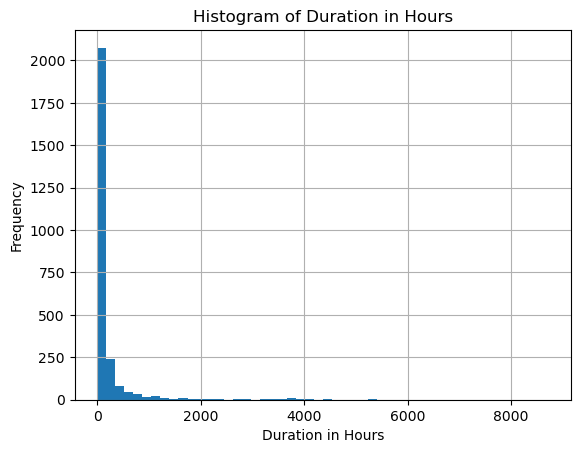

In [47]:
df['duration_hours'] = df['duration'].dt.total_seconds() / 3600

df['duration_hours'].hist(bins = 50)
plt.title('Histogram of Duration in Hours')
plt.xlabel('Duration in Hours')
plt.ylabel('Frequency')
plt.show()

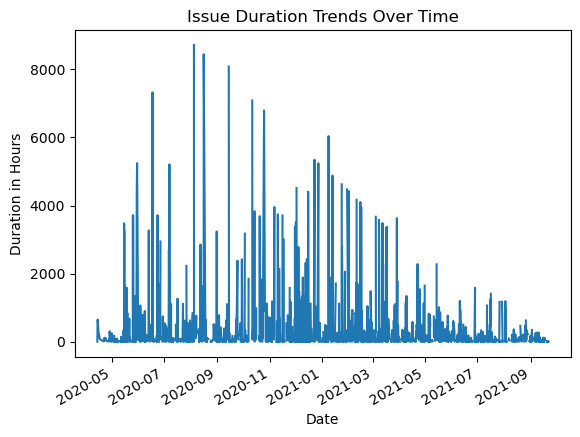

In [48]:
# Plotting issue durations over time
df.set_index('created_at')['duration_hours'].plot()
plt.title('Issue Duration Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Duration in Hours')
plt.show()

In [ ]:
df_exploded = df.explode('labels')

# Average duration by label
df.groupby('labels')['duration_hours'].mean().plot(kind='bar')
# df_exploded.groupby('labels')['duration_hours'].mean().plot(kind='bar')
plt.title('Average Issue Duration by Label')
plt.xlabel('Labels')
plt.ylabel('Average Duration in Hours')
plt.show()


TypeError: unhashable type: 'dict'

state
closed    2615
open       404
Name: count, dtype: int64


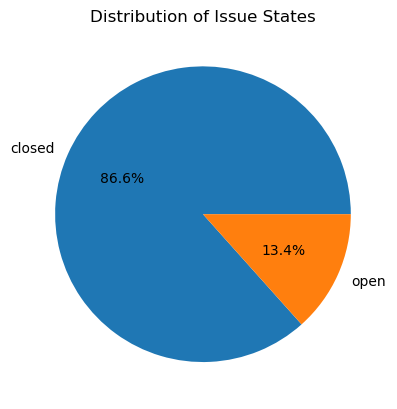

In [50]:
# Analyzing resolution pattern by state
resolution_counts = df['state'].value_counts()
print(resolution_counts)
resolution_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Issue States')
plt.ylabel('')
plt.show()


In [53]:
df.columns

Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'active_lock_reason', 'pull_request', 'body', 'timeline_url',
       'performed_via_github_app', 'is_pull_request', 'duration',
       'duration_hours'],
      dtype='object')

In [60]:
df['created_at'][:10]

0   2021-09-22 08:25:27
1   2021-09-22 07:00:44
2   2021-09-21 15:23:01
3   2021-09-20 18:26:59
4   2021-09-20 15:10:26
5   2021-09-20 14:17:23
6   2021-09-20 11:11:32
7   2021-09-20 10:18:59
8   2021-09-20 09:28:46
9   2021-09-20 06:47:01
Name: created_at, dtype: datetime64[ns]

In [61]:
df['closed_at'][:10]

0                   NaT
1                   NaT
2   2021-09-21 15:30:44
3   2021-09-21 10:14:32
4   2021-09-20 15:28:01
5                   NaT
6   2021-09-20 13:18:28
7   2021-09-20 13:43:02
8   2021-09-20 09:35:59
9   2021-09-20 12:00:16
Name: closed_at, dtype: datetime64[ns]

In [62]:
df['state'][:10]

0      open
1      open
2    closed
3    closed
4    closed
5      open
6    closed
7    closed
8    closed
9    closed
Name: state, dtype: object

In [65]:
df['labels'][:30]

0                                                    []
1                                                    []
2                                                    []
3                                                    []
4                                                    []
5                                                    []
6                                                    []
7                                                    []
8                                                    []
9     [{'id': 1935892871, 'node_id': 'MDU6TGFiZWwxOT...
10    [{'id': 1935892871, 'node_id': 'MDU6TGFiZWwxOT...
11    [{'id': 1935892857, 'node_id': 'MDU6TGFiZWwxOT...
12                                                   []
13    [{'id': 1935892857, 'node_id': 'MDU6TGFiZWwxOT...
14                                                   []
15                                                   []
16                                                   []
17    [{'id': 1935892857, 'node_id': 'MDU6TGFiZW

In [66]:
print(df['labels'].iloc[9])

[{'id': 1935892871, 'node_id': 'MDU6TGFiZWwxOTM1ODkyODcx', 'url': 'https://api.github.com/repos/huggingface/datasets/labels/enhancement', 'name': 'enhancement', 'color': 'a2eeef', 'default': True, 'description': 'New feature or request'}]


In [67]:
import json
print(json.dumps(df['labels'].iloc[9], indent=4))

[
    {
        "id": 1935892871,
        "node_id": "MDU6TGFiZWwxOTM1ODkyODcx",
        "url": "https://api.github.com/repos/huggingface/datasets/labels/enhancement",
        "name": "enhancement",
        "color": "a2eeef",
        "default": true,
        "description": "New feature or request"
    }
]


In [76]:
i = 0
while(i<20):
    print(i)
    print(json.dumps(df['labels'].iloc[i], indent = 4))
    i= i+1


0
[]
1
[]
2
[]
3
[]
4
[]
5
[]
6
[]
7
[]
8
[]
9
[
    {
        "id": 1935892871,
        "node_id": "MDU6TGFiZWwxOTM1ODkyODcx",
        "url": "https://api.github.com/repos/huggingface/datasets/labels/enhancement",
        "name": "enhancement",
        "color": "a2eeef",
        "default": true,
        "description": "New feature or request"
    }
]
10
[
    {
        "id": 1935892871,
        "node_id": "MDU6TGFiZWwxOTM1ODkyODcx",
        "url": "https://api.github.com/repos/huggingface/datasets/labels/enhancement",
        "name": "enhancement",
        "color": "a2eeef",
        "default": true,
        "description": "New feature or request"
    }
]
11
[
    {
        "id": 1935892857,
        "node_id": "MDU6TGFiZWwxOTM1ODkyODU3",
        "url": "https://api.github.com/repos/huggingface/datasets/labels/bug",
        "name": "bug",
        "color": "d73a4a",
        "default": true,
        "description": "Something isn't working"
    }
]
12
[]
13
[
    {
        "id": 1935892857

In [77]:
# Function to extract labels
def extract_labels(labels):
    if labels == '[]':
        return []
    else:
        return [label['name'] for label in eval(labels)]

# Apply function to 'labels' column
df['label_names'] = df['labels'].apply(extract_labels)

# Explode labels into separate rows
df_exploded = df.explode('label_names')

# Count frequency of each label
label_counts = df_exploded['label_names'].value_counts()
print(label_counts)


TypeError: eval() arg 1 must be a string, bytes or code object

### Label Distribution Analysis: 
Analyze how frequently each label is used. This can help identify the most common issues or enhancements requested in the project.

### Label Impact on Resolution Time: 
Compare the resolution times of issues based on their labels (e.g., bugs vs. enhancements). This could reveal if certain types of issues take longer to resolve and require more attention.

### Label Trends Over Time: 
Observe how the usage of labels changes over time. This could indicate shifting priorities or new trends in the types of issues being reported.

###  Correlation Analysis:

 - Correlate labels with other metadata, like the number of comments or specific assignees, to understand if some labels tend to generate more discussion or are handled by specific team members.
 - Investigate if issues with certain labels are more likely to be reopened after being closed, which could indicate problematic areas in the project that need more robust solutions.

###  Data Cleanup:

Given that some rows have empty label lists, determine whether this indicates untagged issues that need to be reviewed or if they should be removed from certain types of analysis.

### Automated Label Assignment:

Develop machine learning models to predict labels for new issues based on the text descriptions. This can streamline the issue triaging process.

###  Reporting and Visualization:

Create visual reports for stakeholders showing key metrics around label usage and issue resolution metrics.
Use visualizations such as bar charts for label frequency or heat maps for correlation analysis.

In [78]:
def extract_labels(labels):
    # Check if the labels are already in list format (which means eval is not needed)
    if isinstance(labels, list):
        return [label['name'] for label in labels]
    # If the labels are in string format, safely convert them
    elif isinstance(labels, str) and labels.startswith('['):
        return [label['name'] for label in eval(labels)]
    return []

# Apply this function to the 'labels' column
df['label_names'] = df['labels'].apply(extract_labels)

# Now you can explode and proceed with other analysis
df_exploded = df.explode('label_names')


In [79]:
label_counts = df_exploded['label_names'].value_counts()
print(label_counts)

label_names
bug                   194
enhancement           117
dataset request        97
dataset bug            36
generic discussion     17
question               15
documentation          14
nlp-viewer             14
speech                 13
metric bug              8
Dataset discussion      7
good first issue        7
refactoring             6
streaming               5
wontfix                 4
help wanted             3
Metric discussion       3
metric request          2
duplicate               1
Name: count, dtype: int64


In [84]:
df['duration_hours'] = (pd.to_datetime(df['closed_at']) - pd.to_datetime(df['created_at'])).dt.total_seconds() / 3600

# Average duration by label
average_duration_by_label = df_exploded.groupby('label_names')['duration_hours'].mean()
print(average_duration_by_label)


label_names
Dataset discussion     177.520926
Metric discussion       62.611667
bug                    147.605833
dataset bug            530.116184
dataset request        713.590585
documentation           74.510177
duplicate               31.312778
enhancement            837.659109
generic discussion    1648.748000
good first issue      1285.719246
help wanted           2020.685278
metric bug             669.070104
metric request         131.640833
nlp-viewer             736.084246
question              1184.452569
refactoring            410.711222
speech                 826.565556
streaming                     NaN
wontfix               2157.087431
Name: duration_hours, dtype: float64


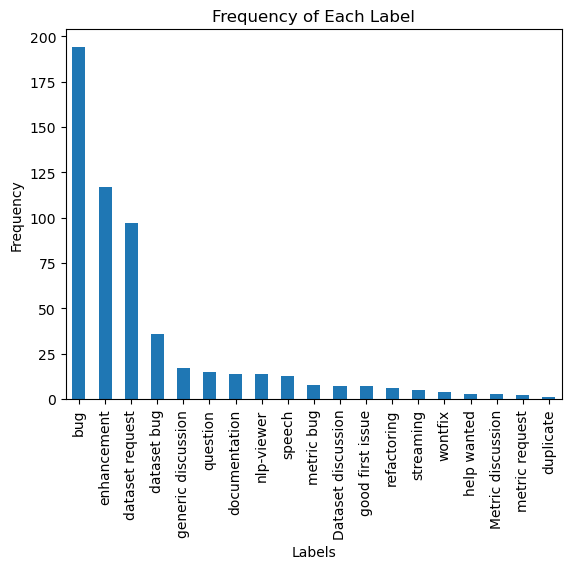

In [85]:
label_counts.plot(kind='bar')
plt.title('Frequency of Each Label')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()


In [99]:
# Make sure 'comments' only contains numeric data; cleanse or filter out non-numeric entries
df['comments'] = pd.to_numeric(df['comments'], errors='coerce')  # Convert to numeric, set errors to 'coerce' to handle exceptions by turning them into NaN

# Drop any rows where 'comments' is NaN after the conversion if they can't be converted
df.dropna(subset=['comments'], inplace=True)

# Assuming df_exploded is already your DataFrame where labels have been exploded
df_exploded['comments'] = pd.to_numeric(df_exploded['comments'], errors='coerce')  # Ensure this column is numeric

# Group by label names and calculate the mean of comments
average_comments_by_label = df_exploded.groupby('label_names')['comments'].mean()

print(average_comments_by_label)


label_names
Dataset discussion   NaN
Metric discussion    NaN
bug                  NaN
dataset bug          NaN
dataset request      NaN
documentation        NaN
duplicate            NaN
enhancement          NaN
generic discussion   NaN
good first issue     NaN
help wanted          NaN
metric bug           NaN
metric request       NaN
nlp-viewer           NaN
question             NaN
refactoring          NaN
speech               NaN
streaming            NaN
wontfix              NaN
Name: comments, dtype: float64


In [104]:
df['comments']

0                                                      []
1       [There is a speed up in Windows machines:\r\n-...
2                                                      []
3       [@lhoestq Let me make sure we never need it, a...
4                                                      []
                              ...                        
3014    [To fix this I propose to modify only the file...
3015    [Yes! I see mostly two options for this:\r\n- ...
3016    [Yes!\r\n- pandas will be a one-liner in `arro...
3017    [My first bug report ❤️\r\nLooking into this r...
3018                                                   []
Name: comments, Length: 3019, dtype: object

In [103]:
df

,url,repository_url,labels_url,comments_url,events_url,html_url,id,node_id,number,title,...,created_at,updated_at,closed_at,author_association,active_lock_reason,pull_request,body,timeline_url,performed_via_github_app,is_pull_request
0,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2955,1003999469,PR_kwDODunzps4sHuRu,2955,Update legacy Python image for CI tests in Linux,...,2021-09-22 08:25:27,2021-09-22 09:23:28,NaT,MEMBER,NaN,{'url': 'https://api.github.com/repos/huggingf...,"Instead of legacy, use next-generation conveni...",https://api.github.com/repos/huggingface/datas...,NaN,True
1,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2954,1003904803,PR_kwDODunzps4sHa8O,2954,Run tests in parallel,...,2021-09-22 07:00:44,2021-09-22 07:56:13,NaT,MEMBER,NaN,{'url': 'https://api.github.com/repos/huggingf...,Run CI tests in parallel to speed up the test ...,https://api.github.com/repos/huggingface/datas...,NaN,True
2,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2952,1002704096,PR_kwDODunzps4sDU8S,2952,Fix missing conda deps,...,2021-09-21 15:23:01,2021-09-22 04:39:59,2021-09-21 15:30:44,MEMBER,NaN,{'url': 'https://api.github.com/repos/huggingf...,`aiohttp` was added as a dependency in #2662 b...,https://api.github.com/repos/huggingface/datas...,NaN,True
3,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2951,1001267888,PR_kwDODunzps4r-lGs,2951,Dummy labels no longer on by default in `to_tf...,...,2021-09-20 18:26:59,2021-09-21 14:00:57,2021-09-21 10:14:32,CONTRIBUTOR,NaN,{'url': 'https://api.github.com/repos/huggingf...,"After more experimentation, I think I have a w...",https://api.github.com/repos/huggingface/datas...,NaN,True
4,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/pull/2950,1001085353,PR_kwDODunzps4r-AKu,2950,Fix fn kwargs in filter,...,2021-09-20 15:10:26,2021-09-20 16:22:59,2021-09-20 15:28:01,MEMBER,NaN,{'url': 'https://api.github.com/repos/huggingf...,#2836 broke the `fn_kwargs` parameter of `filt...,https://api.github.com/repos/huggingface/datas...,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3014,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datasets,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas...,https://github.com/huggingface/datasets/issues/5,600295889,MDU6SXNzdWU2MDAyOTU4ODk=,5,ValueError when a split is empty,...,2020-04-15 13:25:13,2020-04-29 09:23:05,2020-04-29 09:23:05,COLLABORATOR,NaN,None,"When a split is empty either TEST, VALIDATION ...",https://api.github.com/repos/huggingface/datas...,NaN,False
3015,https://api.github.com/repos/huggingface/datas...,https://api.github.com/repos/huggingface/datas

In [109]:
def extract_label_names(labels):
    if isinstance(labels, list):
        return [label['name'] for label in labels if 'name' in label]
    return []

# Apply the function to extract label names
df['label_names'] = df['labels'].apply(extract_label_names)

# Explode the DataFrame to have each label name associated with its corresponding issue
df_exploded = df.explode('label_names')

# Now group by the label names and calculate the sum or mean of comments per label
comments_per_label = df_exploded.groupby('label_names')['comments'].sum()  # You can use sum, mean or count based on what 'comments' represents

# Display the result
print(comments_per_label)

label_names
Dataset discussion    [Hi @vyraun ! The test references for CommonGe...
Metric discussion     [@alexyalunin \r\n\r\nI did something similar ...
bug                   [Hi ! I guess the caching mechanism should hav...
dataset bug           [Thanks @bhavitvyamalik for the fix !\r\nThe f...
dataset request       [@hassiahk is working on it  #2810 , WikiMedia...
documentation         [Cool, love it ! :)\r\n\r\nFeel free to add a ...
duplicate             [Sorry, this is a duplicate of #1287. Not sure...
enhancement           [Cool, I think we can do both :), @lhoestq now...
generic discussion    [After discussing with @lhoestq, a reasonable ...
good first issue      [Hi @lhoestq,\r\nShould we change `desc` in [p...
help wanted           [Unfortunately `concatenate_datasets` only sup...
metric bug            [Hi ! Thanks for reporting.\r\nWe're indeed us...
metric request                                                  [#take]
nlp-viewer            [This looks like an issue with

In [110]:
df.columns

Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'active_lock_reason', 'pull_request', 'body', 'timeline_url',
       'performed_via_github_app', 'is_pull_request', 'label_names'],
      dtype='object')

In [114]:
# Ensure each comment is a string and concatenate the first few comments for a preview
comments_summary = df_exploded.groupby('label_names')['comments'].apply(
    lambda x: ' | '.join([str(comment) for comment in x.head(3)])
)

# Print the summarized comments for each label
for label, comments in comments_summary.items():
    print(f"Label: {label}\nComments Preview: {comments}\n")





Label: Dataset discussion
Comments Preview: [] | ["Hi @vyraun ! The test references for CommonGen are not publicly available: you can reach out to the original dataset authors if you would like to ask for them, but we will not be releasing them as part of GEM (March 31st was the release date for the test set inputs, references are incidentally released for some of the test sets but shouldn't really be used for benchmark submissions)\r\n\r\ncc @sebastiangehrmann", 'Oh okay, thanks @yjernite ! '] | ['Hi ! And thanks for the tips :) \r\n\r\nIndeed currently `wiki_dpr` takes some time to be processed.\r\nMultiprocessing for dataset generation is definitely going to speed up things.\r\n\r\nRegarding the index note that for the default configurations, the index is downloaded instead of being built, which avoid spending time on constructing the index. However in other cases it would be awesome to make the construction faster.\r\n\r\nAny contribution that can help things faster are welcome. In

In [115]:

comments_summary = df_exploded.groupby('label_names')['comments'].apply(
    lambda x: ' | '.join([str(comment) for comment in x.head(3)])
).reset_index()

# Rename columns for clarity
comments_summary.columns = ['Label Name', 'Comments Preview']

# Convert DataFrame to JSON

json_output = comments_summary.to_json(orient='records', lines=False)

# Display the JSON output
print(json_output)


[{"Label Name":"Dataset discussion","Comments Preview":"[] | [\"Hi @vyraun ! The test references for CommonGen are not publicly available: you can reach out to the original dataset authors if you would like to ask for them, but we will not be releasing them as part of GEM (March 31st was the release date for the test set inputs, references are incidentally released for some of the test sets but shouldn't really be used for benchmark submissions)\\r\\n\\r\\ncc @sebastiangehrmann\", 'Oh okay, thanks @yjernite ! '] | ['Hi ! And thanks for the tips :) \\r\\n\\r\\nIndeed currently `wiki_dpr` takes some time to be processed.\\r\\nMultiprocessing for dataset generation is definitely going to speed up things.\\r\\n\\r\\nRegarding the index note that for the default configurations, the index is downloaded instead of being built, which avoid spending time on constructing the index. However in other cases it would be awesome to make the construction faster.\\r\\n\\r\\nAny contribution that can he

In [116]:
df.columns

Index(['url', 'repository_url', 'labels_url', 'comments_url', 'events_url',
       'html_url', 'id', 'node_id', 'number', 'title', 'user', 'labels',
       'state', 'locked', 'assignee', 'assignees', 'milestone', 'comments',
       'created_at', 'updated_at', 'closed_at', 'author_association',
       'active_lock_reason', 'pull_request', 'body', 'timeline_url',
       'performed_via_github_app', 'is_pull_request', 'label_names'],
      dtype='object')

In [117]:
df['timeline_url']

0       https://api.github.com/repos/huggingface/datas...
1       https://api.github.com/repos/huggingface/datas...
2       https://api.github.com/repos/huggingface/datas...
3       https://api.github.com/repos/huggingface/datas...
4       https://api.github.com/repos/huggingface/datas...
                              ...                        
3014    https://api.github.com/repos/huggingface/datas...
3015    https://api.github.com/repos/huggingface/datas...
3016    https://api.github.com/repos/huggingface/datas...
3017    https://api.github.com/repos/huggingface/datas...
3018    https://api.github.com/repos/huggingface/datas...
Name: timeline_url, Length: 3019, dtype: object

In [13]:
import heapq
# uniform cost function
# returns the minimum cost and the path with minimum cost
def  uniform_cost_search(start, goal, graph, cost):
    priority_queue = [(0, start, [])]  # (cost, current_node, path)
    visited = set() 
    answer = {node: {'cost': float('inf'), 'path': []} for node in goal}
    while priority_queue:
        current_cost, node, path = heapq.heappop(priority_queue)
        
        if node in visited:
            continue
        visited.add(node)
        path = path + [node]
        
        if node in goal:
            answer[node]['cost'] = current_cost
            answer[node]['path'] = path
            goal.remove(node)
            if not goal:
                return answer 
        
        for neighbor in graph[node]:
            if (node, neighbor) in cost:
                heapq.heappush(priority_queue, (current_cost + cost[(node, neighbor)], neighbor, path))

    return answer 
 
# main function
if __name__ == '__main__':
     
    # create a graph with no more than 30 nodes
    graph, cost = [[] for i in range(30)], {}
 
    # add edges to the graph
    graph[0].append(4)
    graph[0].append(5)
    graph[0].append(16)
    graph[2].append(1)
    graph[3].append(1)
    graph[4].append(2)
    graph[4].append(3)
    graph[4].append(5)
    graph[5].append(8)
    graph[5].append(18)
    graph[6].append(3)
    graph[6].append(7)
    graph[8].append(16)
    graph[8].append(17)
    graph[16].append(17)
    graph[18].append(6)
    
 
    # add cost to each edge
    cost[(0, 4)] = 3
    cost[(0, 5)] = 9
    cost[(0, 16)] = 1
    cost[(2, 1)] = 2
    cost[(3, 1)] = 2
    cost[(4, 2)] = 1
    cost[(4, 3)] = 8
    cost[(4, 5)] = 2
    cost[(5, 8)] = 3
    cost[(5, 18)] = 2
    cost[(6, 3)] = 3
    cost[(6, 7)] = 2
    cost[(8, 16)] = 4
    cost[(8, 17)] = 4
    cost[(16, 17)] = 15
    cost[(18, 6)] = 1
    
    # set start state 
    start = 0
    
    # set goal state, there can be multiple goal states
    goal = [7]
    
    # call uniform_search_cost function to get the minimum cost to reach the goal and the path with minumum cost
    # ****** You have to implement this function *****
    min_cost_info = uniform_cost_search(start, goal, graph, cost)

    for node, info in min_cost_info.items():
        print(f'Minimum cost from {start} to {node} is {info["cost"]}')
        print(f'Path: {info["path"]}')

Minimum cost from 0 to 7 is 10
Path: [0, 4, 5, 18, 6, 7]


In [4]:
from transformers import pipeline

pipe = pipeline("text-generation", model="deepseek-ai/DeepSeek-R1", trust_remote_code=True, device="cpu")

messages = [{"role": "user", "content": "Who are you?"}]
response = pipe(messages)

print(response)


ImportError: Loading an FP8 quantized model requires accelerate (`pip install accelerate`)

In [2]:
!pip install accelerate

In [10]:
from transformers import AutoTokenizer, AutoModelWithLMHead

tokenizer = AutoTokenizer.from_pretrained("mrm8488/t5-base-finetuned-emotion")

model = AutoModelWithLMHead.from_pretrained("mrm8488/t5-base-finetuned-emotion")

def get_emotion(text):
  input_ids = tokenizer.encode(text + '</s>', return_tensors='pt')

  output = model.generate(input_ids=input_ids,
               max_length=2)
  
  dec = [tokenizer.decode(ids) for ids in output]
  label = dec[0]
  return label
  
get_emotion("i feel as if i havent blogged in ages are at least truly blogged i am doing an update cute") # Output: 'joy'
 
get_emotion("i have a feeling i kinda lost my best friend") # Output: 'sadness'


ValueError: Converting from Tiktoken failed, if a converter for SentencePiece is available, provide a model path with a SentencePiece tokenizer.model file.Currently available slow->fast convertors: ['AlbertTokenizer', 'BartTokenizer', 'BarthezTokenizer', 'BertTokenizer', 'BigBirdTokenizer', 'BlenderbotTokenizer', 'CamembertTokenizer', 'CLIPTokenizer', 'CodeGenTokenizer', 'ConvBertTokenizer', 'DebertaTokenizer', 'DebertaV2Tokenizer', 'DistilBertTokenizer', 'DPRReaderTokenizer', 'DPRQuestionEncoderTokenizer', 'DPRContextEncoderTokenizer', 'ElectraTokenizer', 'FNetTokenizer', 'FunnelTokenizer', 'GPT2Tokenizer', 'HerbertTokenizer', 'LayoutLMTokenizer', 'LayoutLMv2Tokenizer', 'LayoutLMv3Tokenizer', 'LayoutXLMTokenizer', 'LongformerTokenizer', 'LEDTokenizer', 'LxmertTokenizer', 'MarkupLMTokenizer', 'MBartTokenizer', 'MBart50Tokenizer', 'MPNetTokenizer', 'MobileBertTokenizer', 'MvpTokenizer', 'NllbTokenizer', 'OpenAIGPTTokenizer', 'PegasusTokenizer', 'Qwen2Tokenizer', 'RealmTokenizer', 'ReformerTokenizer', 'RemBertTokenizer', 'RetriBertTokenizer', 'RobertaTokenizer', 'RoFormerTokenizer', 'SeamlessM4TTokenizer', 'SqueezeBertTokenizer', 'T5Tokenizer', 'UdopTokenizer', 'WhisperTokenizer', 'XLMRobertaTokenizer', 'XLNetTokenizer', 'SplinterTokenizer', 'XGLMTokenizer', 'LlamaTokenizer', 'CodeLlamaTokenizer', 'GemmaTokenizer', 'Phi3Tokenizer']

In [6]:
!pip install tiktoken transformers



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.8 MB/s eta 0:00:000m eta -:--:--
